# FFT d'un signal réel


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal as signal
import numpy as np

On va ici faire la transformée de fourier d'un signal triangulaire de fréquence 5 Hz.

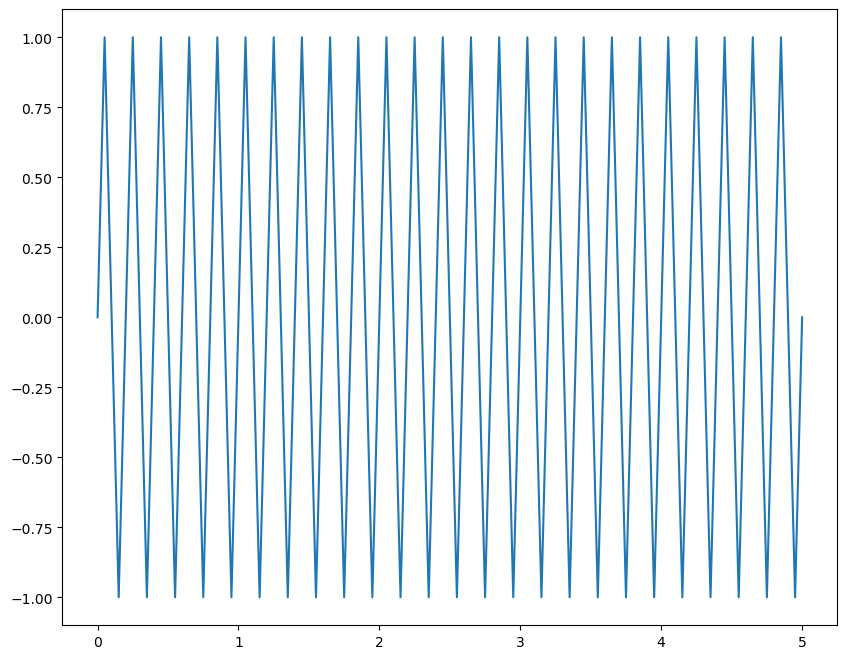

In [9]:
sampling = 1001
ts, dt = np.linspace(0, 5, sampling, retstep=True)
freq = 5
fig = plt.figure(figsize=(10, 8))
triangle = signal.sawtooth(2 * np.pi * freq * ts + np.pi / 2, 0.5)
plt.plot(ts, triangle)

On peut tracer la transformée de fourier, les composantes négatives sont dues au problème de déphasage entre les différentes harmoniques.

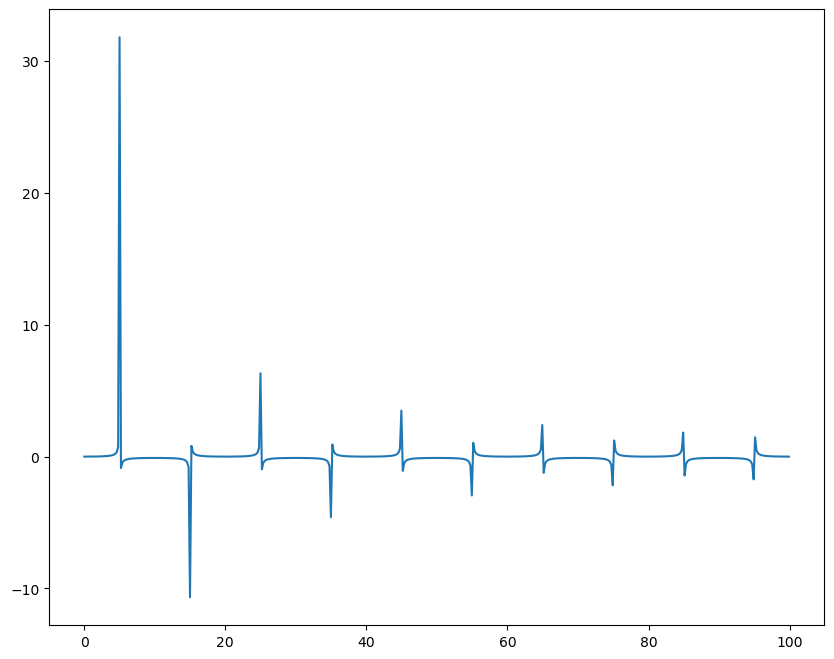

In [10]:
sampleSize = ts.size
fft_signal = np.fft.rfft(triangle)  # , norm = "ortho")
freq_signal = np.fft.rfftfreq(sampleSize, d=dt)

fig = plt.figure(figsize=(10, 8))
plt.plot(freq_signal, fft_signal)

On peut aussi utiliser la version « complète » qui donnera un signal complexe.

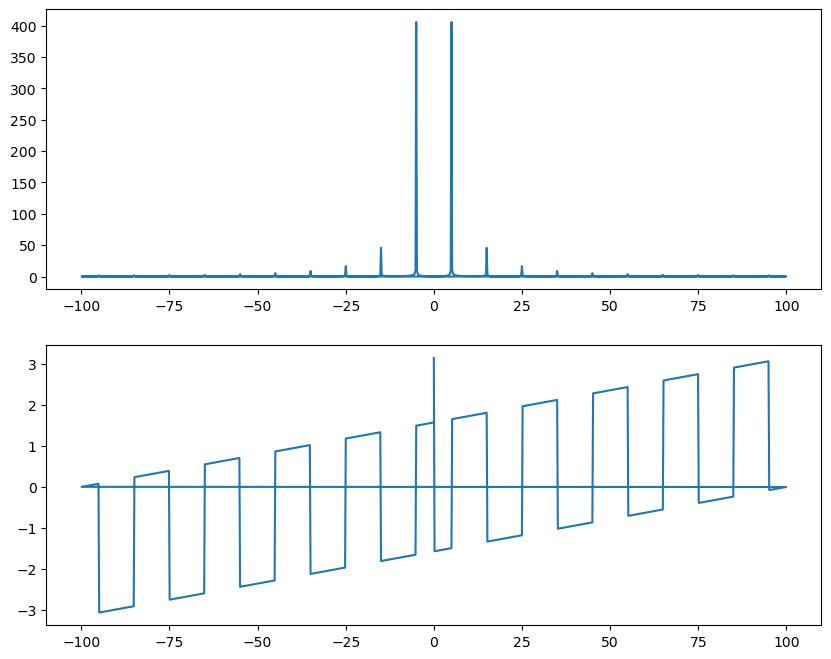

In [13]:
sampleSize = ts.size
fft_signal = np.fft.fft(triangle)  # , norm = "ortho")
freq_signal = np.fft.fftfreq(sampleSize, d=dt)

fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1)

# amplitude
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(freq_signal, np.abs(fft_signal))

# phase
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(freq_signal, np.angle(fft_signal))

Il est ensuite possible de retracer le signal à partir de la transformée de fourier.

<function matplotlib.pyplot.show(close=None, block=None)>

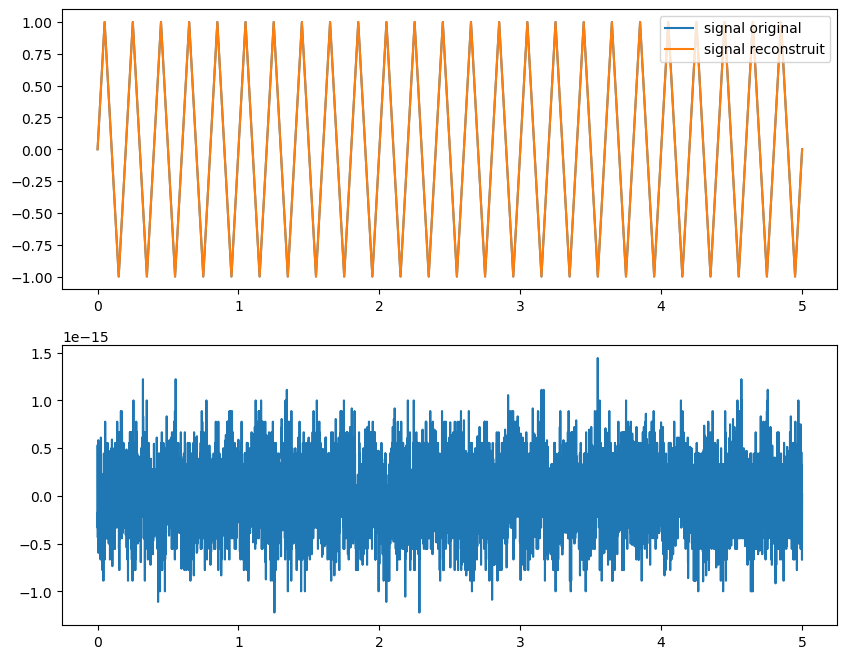

In [5]:
sampleSize = ts.size


fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gs[0, 0])
# tracé des deux signaux
ax1.plot(ts, triangle, label="signal original")
ax1.plot(ts, np.fft.irfft(fft_signal, n=sampling), label="signal reconstruit")
ax1.legend()

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(ts, triangle - np.fft.irfft(fft_signal, n=sampling), label="signal original")


plt.show